In [40]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import Performance
from IPython import display

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [41]:
X_train = np.genfromtxt('xtrain.csv', delimiter=",")
y_train = np.genfromtxt('ytrain.csv', delimiter=",")
X_val = np.genfromtxt('xval.csv', delimiter=",")
y_val = np.genfromtxt('yval.csv', delimiter=",")
X_test = np.genfromtxt('xtest.csv', delimiter=",")
y_test = np.genfromtxt('ytest.csv', delimiter=",")
data = X_train, y_train, X_val, y_val, X_test, y_test
for s in data:
    print s.shape

(37000, 20)
(37000,)
(5000, 20)
(5000,)
(10500, 20)
(10500,)


In [37]:
fake_y = np.ones_like(y_train).astype(float)

In [90]:

def f(x):
    return np.log(1 + np.exp(x))
#def df(y):
 #   return np.divide(1.0, 1. + np.exp(-1 * np.log(np.exp(y) - 1.0)))
def df(y):
    return np.divide(1., 1. + np.exp(-y))
'''
def f(x):
    return 1. / (1. + np.exp(-x))
def df(y):
    return np.multiply(y, 1.-y)
'''
m = X_train.shape[0]

n0 = 20
n1 = 64
n2 = 1

eta = .01
epsinit = .01

# shared initialization
rand1 = epsinit * np.random.randn(n0)
rand2 = epsinit * np.random.randn(n1)
W1 = np.zeros((n1, n0))
W2 = np.zeros((n2, n1))
for i in xrange(n1):
    W1[i,:] = rand1
for i in xrange(n2):
    W2[i,:] = rand2

'''
# standard initialization
W1 = epsinit * np.random.randn(n1,n0)
W2 = epsinit * np.random.randn(n2,n1)
'''
b1 = epsinit * np.random.randn(n1)
b2 = epsinit * np.random.randn(n2)


tmax = 600000            # maximum number of learning updates
tshow = 5000             # how often to pause for visualization
errsq = np.zeros(tmax)
loss = np.zeros(tmax)

In [91]:
def Poiss(pred, actual):
    return pred - actual*np.log(pred + 1e-07)
def Poiss_diff(pred, actual):
    return 1. - np.divide(actual, pred + 1e-07)

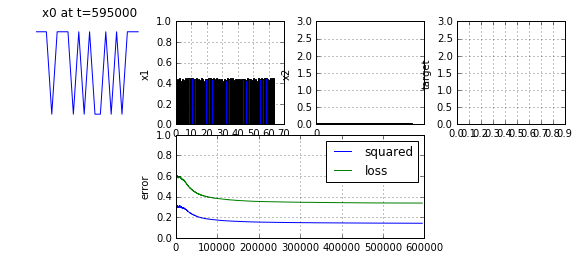

In [92]:
fig_size = (12,12)                           # you may need to change the numbers to fit your screen
for t in xrange(tmax):
    i = int(np.ceil(m*np.random.rand()))     # choose randomly from the training set

    x0 = X_train[i-1,:]
    y = y_train[i-1]
        
    # forward pass   
    x1 = f(np.dot(W1,x0)+b1)
    x2 = f(np.dot(W2,x1)+b2)
    
    # error computation
    errsq[t] = sum(np.power((y-x2), 2))
    loss[t] = Poiss(x2, y)
    
    # backward pass
    delta2 = np.multiply((y - x2),df(x2))
    delta2_s = np.zeros_like(delta2)
    delta2_s.fill(np.mean(delta2))
    #delta2.fill(np.mean(delta2)) # avg
    #delta2.fill(np.max(delta2)) # max
    #delta2.fill(np.min(delta2)) # min

    delta1 = np.multiply(np.dot(W2.T, delta2), df(x1))
    delta1_s = np.zeros_like(delta1)
    delta1_s.fill(np.mean(delta1))
    #delta1.fill(np.mean(delta1)) # avg
    #delta1.fill(np.max(delta1)) # max
    #delta1.fill(np.min(delta1)) # min
    
    # learning updates
    W2 += eta*np.outer(delta2_s, x1)
    W1 += eta*np.outer(delta1_s, x0)
    b2 += eta*delta2
    b1 += eta*delta1

    if t % tshow == 0:    # visualization every tshow steps
        avgerrsq = np.divide( np.cumsum(errsq[0:t]), np.arange(1,t+1) )
        avgloss = np.divide( np.cumsum(loss[0:t]), np.arange(1,t+1) )
        
        fig = plt.figure(figsize=fig_size)
        gs = gridspec.GridSpec(6,5, wspace=0.3, hspace=0.1)

        ax = fig.add_subplot(gs[0,0])
        ax.axis('off')
        ax.set_title("x0 at t={}".format(t))
        ax.plot(x0)

        ax = fig.add_subplot(gs[0,1])
        ax.bar(range(len(x1)), x1)
        ax.set_ylabel("x1")
        ax.set_ylim([0,1])
        ax.grid()

        ax = fig.add_subplot(gs[0,2])
        ax.bar(range(len(x2)), x2)
        ax.set_ylabel("x2")
        ax.set_ylim([0,3])
        ax.set_xticks(range(0,1))
        ax.grid()

        ax = fig.add_subplot(gs[0,3])
        ax.bar(y,y)
        ax.set_ylabel("target")
        ax.set_ylim([0,3])
        ax.grid()
        
        ax = fig.add_subplot(gs[1,1:3])
        ax.plot(avgerrsq, label="squared")
        ax.plot(avgloss, label="loss")
        ax.set_ylabel("error")
        ax.set_ylim([0,1])
        ax.grid()
        ax.legend()

        display.display(plt.gcf())
        time.sleep(0.01)
        display.clear_output(wait=True)
        fig.clf()
        plt.close(fig)



In [55]:
def predict(x0):
    x1 = f(np.dot(W1,x0)+b1)
    x2 = f(np.dot(W2,x1)+b2)
    return x2

In [16]:
def make_preds(data):
    preds = np.zeros((len(data),))
    for i in xrange(len(data)):
        preds[i] = predict(data[i,:])
    return preds 

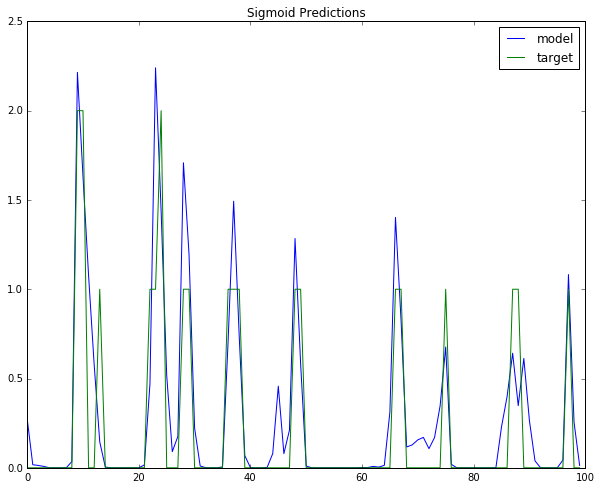

In [57]:
test_preds = make_preds(X_test)
sig_loss = loss
plt.plot(test_preds[:100], label='model')
plt.plot(y_test[:100], label='target')
plt.legend()
plt.title("Sigmoid Predictions")
plt.show()

In [73]:
print np.mean(sig_loss)

0.312947934891


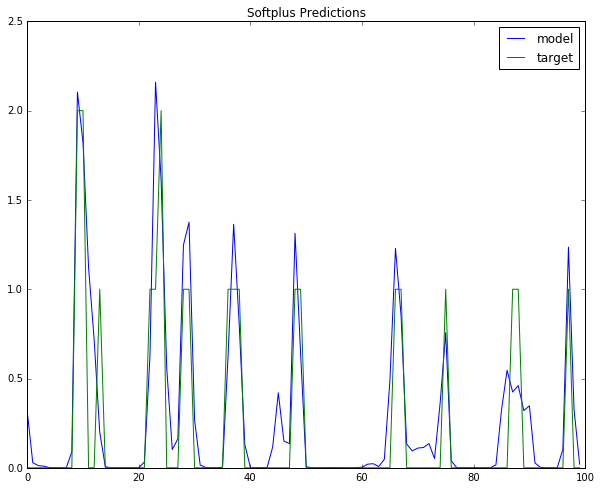

In [27]:
test_preds = make_preds(X_test)
soft_loss = loss
plt.plot(test_preds[:100], label='model')
plt.plot(y_test[:100], label='target')
plt.legend()
plt.title("Softplus Predictions")
plt.show()

In [74]:
print np.mean(soft_loss)

0.318887655605


In [28]:
soft_NLL = Performance.getNegLogLi(test_preds, y_test)
print soft_NLL

2986.07038716


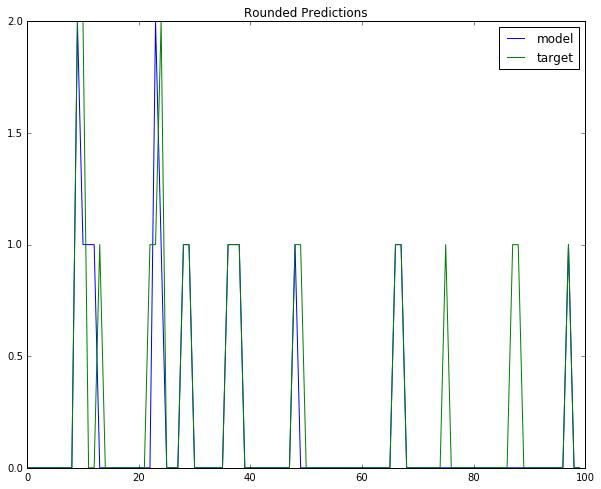

In [34]:
round_preds = make_preds(X_test)
round_loss = loss
plt.plot(round_preds[:100], label='model')
plt.plot(y_test[:100], label='target')
plt.legend()
plt.title("Rounded Predictions")
plt.show()

7034
(7034, 20)


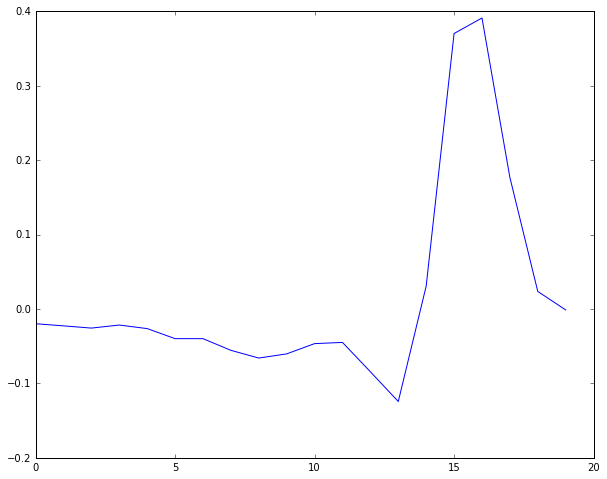

In [50]:
spk_bins = X_train[y_train >= 1.]
print len(spk_bins)
print spk_bins.shape
avg_stim = np.mean(spk_bins, axis=0)
plt.plot(avg_stim)
plt.show()

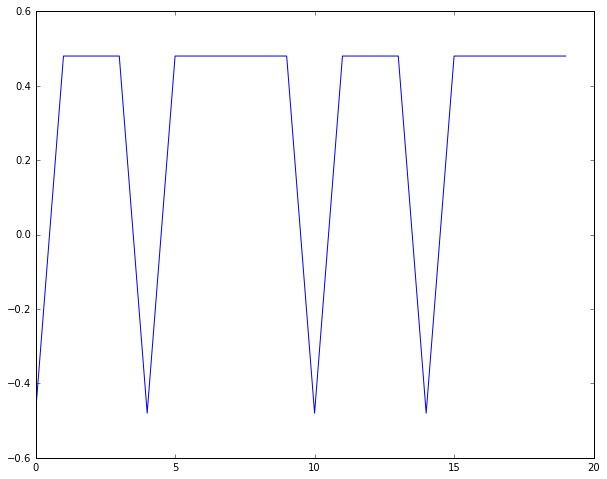

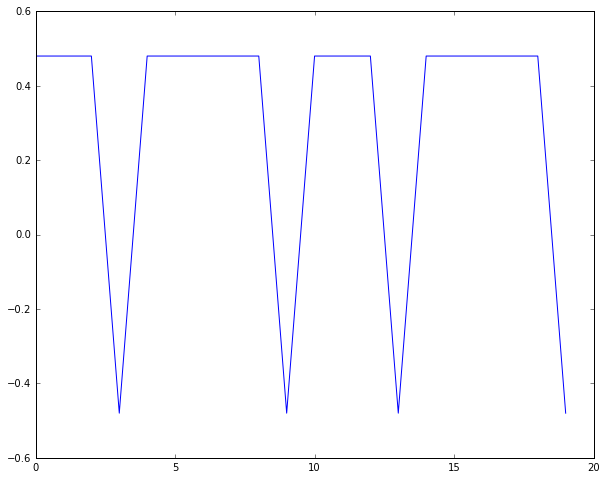

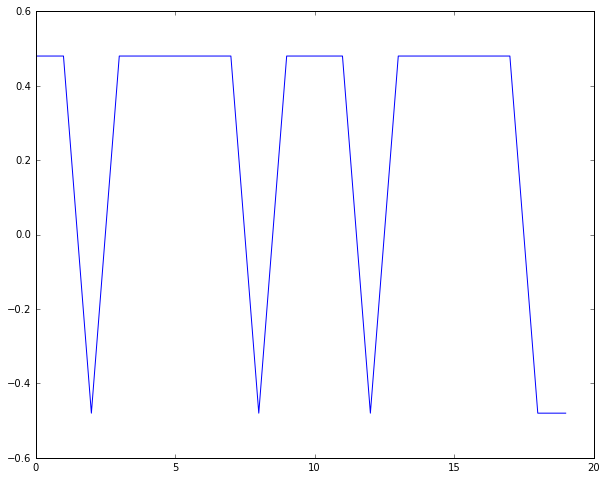

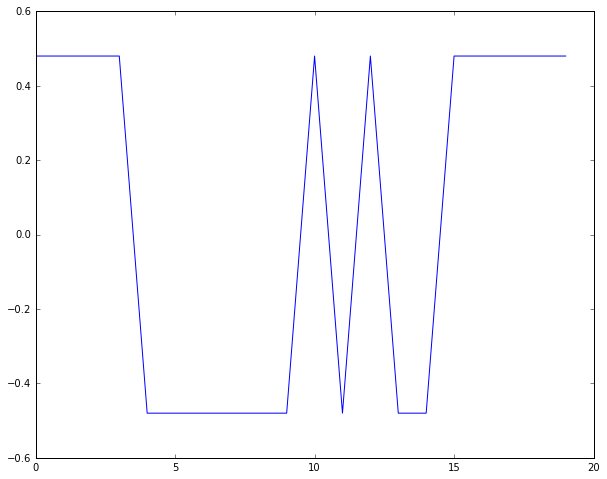

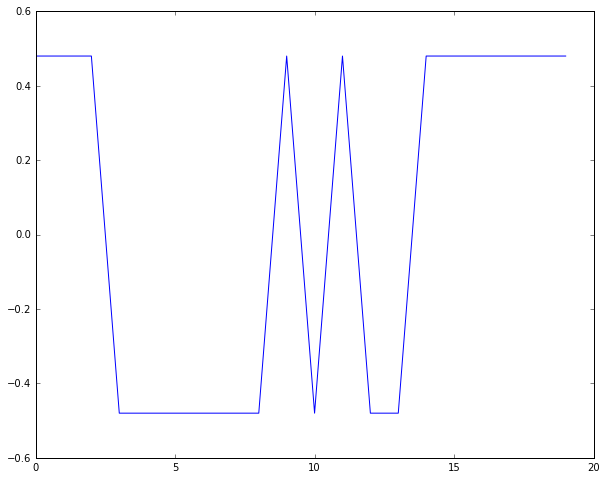

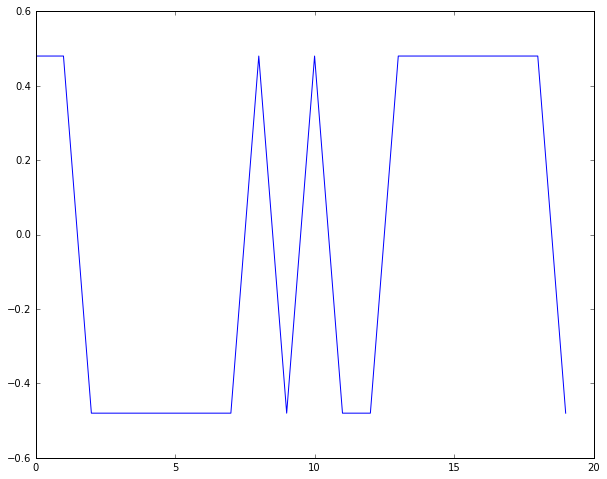

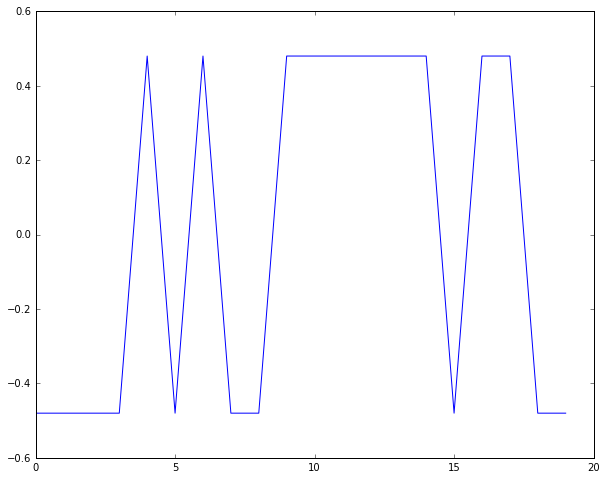

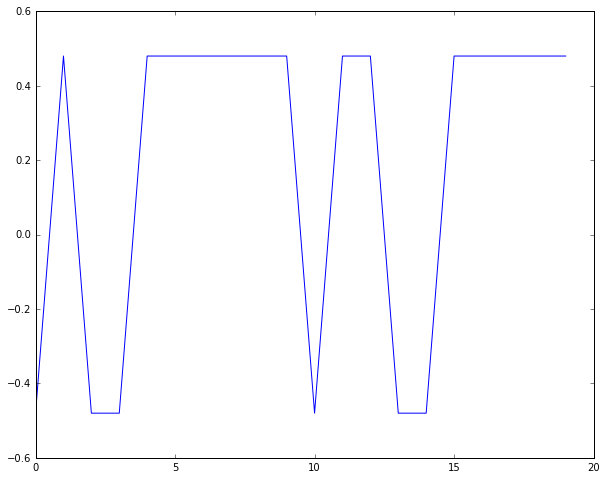

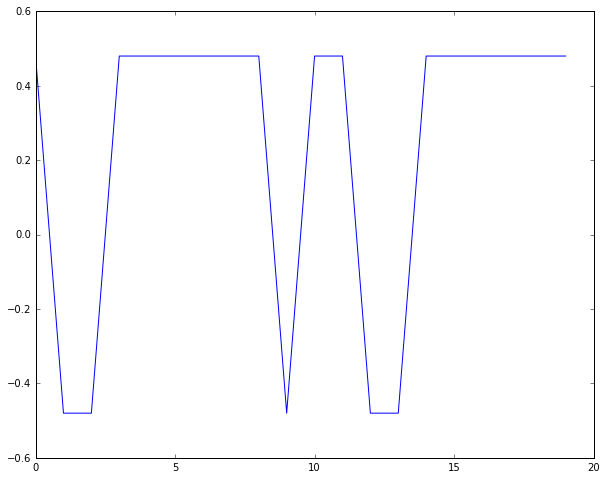

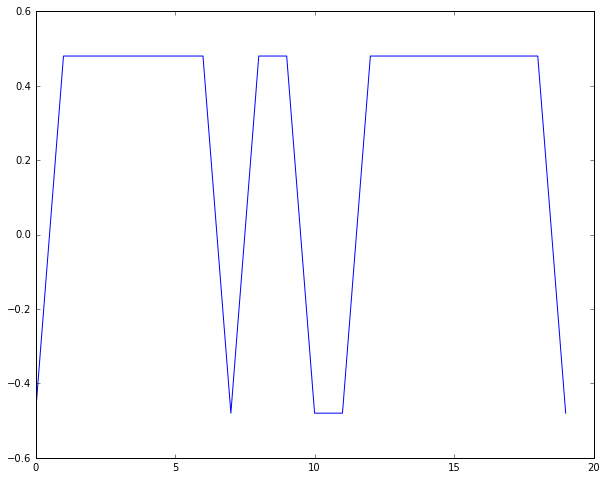

In [51]:
for i in xrange(10):
    plt.plot(spk_bins[i,:])
    plt.show()

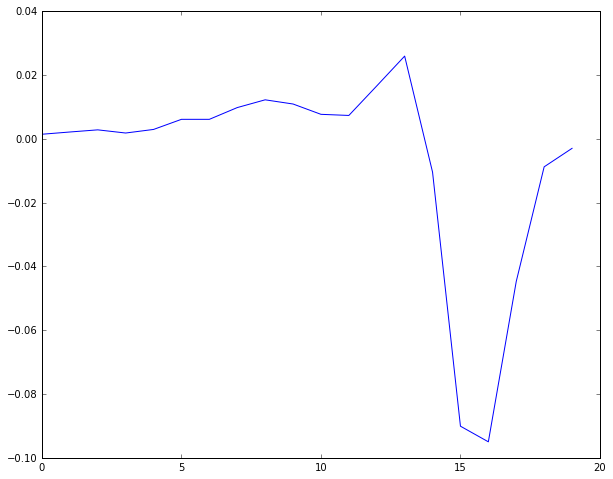

In [53]:
nspks = X_train[y_train == 0.]
avg_nspk = np.mean(nspks, axis=0)
plt.plot(avg_nspk)
plt.show()

In [56]:
print predict(avg_stim)

[ 1.23440976]


In [76]:
best_ind = np.where(test_preds==np.max(test_preds))[0]
best_stim = X_test[best_ind,:]
print best_stim

[[-0.48  0.48 -0.48  0.48 -0.48 -0.48 -0.48 -0.48 -0.48 -0.48  0.48  0.48
   0.48 -0.48 -0.48  0.48  0.48  0.48  0.48 -0.48]]


Shared weights with average gradient:

In [77]:
avg_loss = np.mean(loss)
print avg_loss

0.334426416921


In [78]:
print W1[:2,:]

[[ 0.02241464  0.02500483  0.0441731   0.04932244  0.0480295   0.0606567
   0.07324548  0.08968143  0.11228844  0.09699034  0.07043574  0.05454525
   0.14595016  0.23276367  0.05688554 -0.68608341 -0.74250989 -0.38024714
  -0.03024737  0.01355708]
 [ 0.02241464  0.02500483  0.0441731   0.04932244  0.0480295   0.0606567
   0.07324548  0.08968143  0.11228844  0.09699034  0.07043574  0.05454525
   0.14595016  0.23276367  0.05688554 -0.68608341 -0.74250989 -0.38024714
  -0.03024737  0.01355708]]


Shared weights with max gradient: blows up

Shared weights with min gradient: meh

In [85]:
min_loss = np.mean(loss)
print avg_loss

0.334426416921


In [ ]:
print np.mean(loss)